### INGESTION

In [1]:
import pandas as pd
import numpy as np
import os
import json
from datetime import datetime

In [2]:
#############Load config.json and get input and output paths
with open('config.json','r') as f:
    config = json.load(f) 

input_folder_path = config['input_folder_path']
print(input_folder_path)
output_folder_path = config['output_folder_path']
print(output_folder_path)

practicedata
ingesteddata


In [19]:
main_df = pd.DataFrame(columns=[
    'corporation', 'lastmonth_activity', 'lastyear_activity', 'number_of_employees', 'exited'
    ])
main_df.head(1)

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited


In [27]:
ingested_files = []

In [28]:
current_dir = os.getcwd()
input_dir = os.path.join(os.getcwd(), input_folder_path)
input_files = os.listdir(input_dir)
for file_name in input_files:
    print(file_name)
    if '.csv' in file_name:
        print(os.path.join(input_dir,file_name))
        df = pd.read_csv(os.path.join(input_dir,file_name))
        main_df = pd.concat([main_df, df], ignore_index=True)
        ingested_files.append(file_name)

dataset2.csv
\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\practicedata\dataset2.csv
dataset1.csv
\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\practicedata\dataset1.csv


In [29]:
ingested_files

['dataset2.csv', 'dataset1.csv']

In [22]:
main_df.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0
3,acme,101,10983,2,1
4,qwer,0,118,42,1


In [23]:
print(main_df.shape)
main_df = main_df.drop_duplicates()
print(main_df.shape)

(36, 5)
(26, 5)


In [24]:
# save to outout folder
output_dir = os.path.join(os.getcwd(), output_folder_path)
print(output_dir)

\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\ingesteddata


In [26]:
main_df.to_csv(os.path.join(output_dir, 'finaldata.csv'))

In [30]:
with open(os.path.join(output_dir, 'ingestedfiles.txt'), 'w') as tfile:
    tfile.write('\n'.join(ingested_files))

### MODEL TRAINING

In [1]:
from flask import Flask, session, jsonify, request
import pandas as pd
import numpy as np
import pickle
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import json

In [2]:
# Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

dataset_csv_path = os.path.join(config['output_folder_path'])
print(dataset_csv_path)
model_path = os.path.join(config['output_model_path'])
print(model_path)

ingesteddata
practicemodels


In [3]:
data_dir = os.path.join(os.getcwd(), dataset_csv_path)
print(data_dir)

\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\ingesteddata


In [8]:
data = pd.read_csv(os.path.join(data_dir, 'finaldata.csv'), index_col=0)
print(data.shape)
data.head()

(26, 5)


,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0
3,acme,101,10983,2,1
4,qwer,0,118,42,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 29
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   corporation          26 non-null     object
 1   lastmonth_activity   26 non-null     int64 
 2   lastyear_activity    26 non-null     int64 
 3   number_of_employees  26 non-null     int64 
 4   exited               26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


In [24]:
X = data[['lastmonth_activity', 'lastyear_activity', 'number_of_employees']]
y = data['exited']
print(y.shape)

(26,)


In [29]:
lg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                intercept_scaling=1, l1_ratio=None, max_iter=100,
                multi_class='auto', n_jobs=None, penalty='l2',
                random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                warm_start=False)

model = lg.fit(X, y)

In [30]:
print(os.path.join(os.getcwd(), model_path, 'trainedmodel.pkl'))

\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\practicemodels\trainedmodel.pkl


In [31]:
pickle.dump(model, open(os.path.join(os.getcwd(), model_path, 'trainedmodel.pkl'), 'wb'))

### MODEL SCORING

In [32]:
from flask import Flask, session, jsonify, request
import pandas as pd
import numpy as np
import pickle
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import json

In [36]:
# Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

model_path = os.path.join(config['output_model_path'])
print(model_path)
test_data_path = os.path.join(config['test_data_path'])
print(test_data_path)

practicemodels
testdata


In [37]:
model_dir = os.path.join(os.getcwd(), model_path)
print(model_dir)

\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\practicemodels


In [42]:
model = pickle.load(open(os.path.join(os.getcwd(), model_dir, 'trainedmodel.pkl'), 'rb'))
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [44]:
testdata_dir = os.path.join(os.getcwd(), test_data_path)
testdata = pd.read_csv(os.path.join(testdata_dir, 'testdata.csv'))
print(testdata.shape)

(5, 5)


In [45]:
X_test = testdata[['lastmonth_activity', 'lastyear_activity', 'number_of_employees']]
y_test = testdata['exited']

In [46]:
pred = model.predict(X_test)

In [48]:
f1score = metrics.f1_score(pred, y_test)

In [51]:
with open(os.path.join(model_path, 'latestscore.txt'), 'w') as tfile:
        tfile.write(str(f1score))

### MODEL DEPLOYMENT

In [52]:
from flask import Flask, session, jsonify, request
import pandas as pd
import numpy as np
import pickle
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import json

In [63]:
with open('config.json','r') as f:
    config = json.load(f)

model_path = os.path.join(config['output_model_path'])
print(model_path)
ingested_data_path = os.path.join(config['output_folder_path'])
print(ingested_data_path)
prod_deployment_path = os.path.join(config['prod_deployment_path'])
print(prod_deployment_path)

practicemodels
ingesteddata
production_deployment


In [59]:
latestscore_dir = os.path.join(os.getcwd(), model_path)
latestscore = open(os.path.join(os.getcwd(), latestscore_dir, 'latestscore.txt'), 'r').read()

output_dir = latestscore_dir = os.path.join(os.getcwd(), prod_deployment_path)
with open(os.path.join(os.getcwd(), output_dir, 'latestscore.txt'), 'w') as txt_file:
    txt_file.write(str(latestscore))

In [62]:
ingested_dir = os.path.join(os.getcwd(), ingested_data_path)
ingested_data = open(os.path.join(os.getcwd(), ingested_dir, 'ingestedfiles.txt'), 'r').read()
print(ingested_data)

with open(os.path.join(os.getcwd(), output_dir, 'ingestedfiles.txt'), 'w') as txt_file:
    txt_file.write(str(ingested_data))

dataset2.csv
dataset1.csv


In [66]:
model_dir = os.path.join(os.getcwd(), model_path)
print(model_dir)

\\wsl.localhost\Ubuntu\home\chafund\GIT\Dynamic_Risk_Assessment_System\practicemodels


In [69]:
import shutil

In [70]:
shutil.copyfile(
    os.path.join(os.getcwd(), model_dir, 'trainedmodel.pkl'),
    os.path.join(os.getcwd(), output_dir, 'trainedmodel.pkl')
)

'\\\\wsl.localhost\\Ubuntu\\home\\chafund\\GIT\\Dynamic_Risk_Assessment_System\\production_deployment\\trainedmodel.pkl'

### DIAGNOSTIC

In [75]:
with open('config.json','r') as f:
    config = json.load(f)

prod_path = os.path.join(config['prod_deployment_path'])
print(prod_path) 
test_data_path = os.path.join(config['test_data_path'])
print(test_data_path)
output_path = os.path.join(config['output_folder_path'])
print(output_path)

production_deployment
testdata
ingesteddata


In [93]:
def read_data(path, file_name):
    testdata = pd.read_csv(os.path.join(path, file_name))
    X = testdata[['lastmonth_activity', 'lastyear_activity', 'number_of_employees', 'exited']]
    return X

In [94]:
X = read_data(os.path.join(os.getcwd(), test_data_path), 'testdata.csv')
print(X.shape)
X.head()

(5, 4)


,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,234,3,10,1
1,14,2145,99,0
2,34,333,1000,0
3,101,12346,2,1
4,0,675,25,1


In [95]:
X.mean(axis=0)

lastmonth_activity       76.6
lastyear_activity      3100.4
number_of_employees     227.2
exited                    0.6
dtype: float64

In [96]:
# Function to get model predictions
def model_predictions(path, file_name):
    #read the deployed model
    model_dir = os.path.join(os.getcwd(), prod_path)
    model = pickle.load(open(os.path.join(os.getcwd(), model_dir, 'trainedmodel.pkl'), 'rb'))
    # and a test dataset
    X = read_data(os.path.join(os.getcwd(), path), file_name)
    X.drop(['exited'], axis=1, inplace=True)
    # calculate predictions
    pred = list(model.predict(X))
    return pred

In [97]:
pred = model_predictions(test_data_path, 'testdata.csv')
print(pred)

[0, 1, 1, 1, 1]


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [100]:
def dataframe_summary(data_path, file_name):
    summary_stats = []
    X = read_data(data_path, file_name)
    pred = model_predictions(data_path, file_name)
    X['prediction'] = pred
    for col in X.columns:
        summary_stats.append(X[col].mean())
        summary_stats.append(X[col].median())
        summary_stats.append(X[col].std())
    return summary_stats

In [102]:
summary_stats_ls = dataframe_summary(output_path, 'finaldata.csv')
print(summary_stats_ls)

[165.65384615384616, 73.0, 284.0332293669446, 1502.923076923077, 955.0, 2192.64495845683, 26.884615384615383, 14.0, 31.35388578543581, 0.5769230769230769, 1.0, 0.5038314736557788, 0.7307692307692307, 1.0, 0.4523443208612048]


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [103]:
def dataframe_na(data_path, file_name):
    na_count = []
    X = read_data(data_path, file_name)
    pred = model_predictions(data_path, file_name)
    X['prediction'] = pred
    for col in X.columns:
        na_count.append(X[col].isna().sum()/X.shape[0])
    return na_count

In [105]:
na_count_ls = dataframe_na(output_path, 'finaldata.csv')
print(na_count_ls)

[0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [108]:
import timeit

In [109]:
def execution_time():
    timing_list = []
    # timing ingestion script
    starttime = timeit.default_timer()
    os.system('python3 ingestion.py')
    timing_list.append(timeit.default_timer() - starttime)

    # timing training script
    starttime = timeit.default_timer()
    os.system('python3 training.py')
    timing_list.append(timeit.default_timer() - starttime)

    return timing_list

In [110]:
execution_time()

[0.16129959998943377, 0.14875459999893792]

In [125]:
from importlib.metadata import version
version('pandas')

'2.2.0'

In [137]:
from importlib.metadata import version
from tabulate import tabulate

def check_module_versions(requirements_file):
    # Read the requirements.txt file
    with open(requirements_file, 'r') as f:
        requirements = f.readlines()

    # Strip newline characters and split by '==' to get module names
    modules = [line.strip().split('==')[0] for line in requirements]
    versions = [line.strip().split('==')[1] for line in requirements]
    # Initialize a list to store module information
    module_info = []
    for module, vers in zip(modules, versions):
    # Append module information to the list
        module_info.append([module, vers, version(module)])

    # Output module information in a table format
    headers = ["Module Name", "Latest Version", "Installed Version"]
    print(tabulate(module_info, headers=headers, tablefmt="grid"))

In [138]:
requirements_file = 'requirements.txt'
check_module_versions(requirements_file)

+--------------------+------------------+---------------------+
| Module Name        | Latest Version   | Installed Version   |
+====================+==================+=====================+
| click              | 8.1.7            | 8.1.3               |
+--------------------+------------------+---------------------+
| cycler             | 0.12.1           | 0.11.0              |
+--------------------+------------------+---------------------+
| Flask              | 3.0.2            | 2.2.2               |
+--------------------+------------------+---------------------+
| gunicorn           | 21.2.0           | 20.1.0              |
+--------------------+------------------+---------------------+
| itsdangerous       | 2.1.2            | 2.1.2               |
+--------------------+------------------+---------------------+
| Jinja2             | 3.1.3            | 3.1.2               |
+--------------------+------------------+---------------------+
| joblib             | 1.3.2            

### REPORTING

In [ ]:
{"input_folder_path": "practicedata",
 "output_folder_path": "ingesteddata",
 "test_data_path": "testdata",
 "output_model_path": "practicemodels",
 "prod_deployment_path": "production_deployment"
 }

In [2]:
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

In [3]:
# Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

prod_path = os.path.join(config['prod_deployment_path'])
test_data_path = os.path.join(config['test_data_path'])
output_path = os.path.join(config['output_model_path'])
print(prod_path, test_data_path, output_path)

production_deployment testdata practicemodels


In [4]:
import diagnostics

In [5]:
X, y = diagnostics.read_data(os.path.join(os.getcwd(), test_data_path), 'testdata.csv')
print(X.shape, y.shape)

(5, 4) (5,)


In [6]:
pred = diagnostics.model_predictions(os.path.join(os.getcwd(), test_data_path), 'testdata.csv')
print(pred)

[0, 1, 1, 1, 1]


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


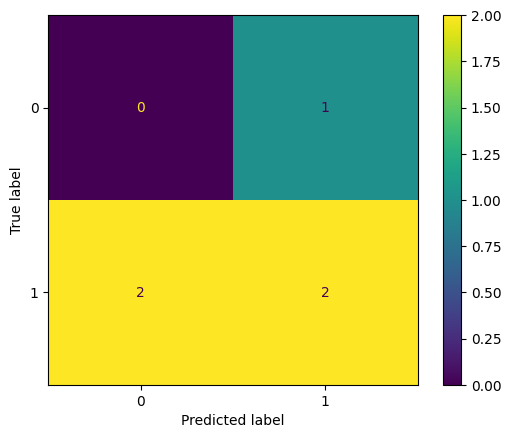

In [15]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(pred, y))
disp.plot()
fig = disp.figure_
fig.savefig(os.path.join(os.getcwd(), output_path, 'confusionmatrix.png'))

### APIs

In [1]:
import requests

In [20]:
response1 = requests.post('http://127.0.0.1:8000/prediction?').content
print(response1)

b'[0, 1, 1, 1, 1]'


In [4]:
response2 = requests.get('http://127.0.0.1:8000/scoring?').content
print(response2)

b'0.5714285714285714'


In [5]:
response3 = requests.get('http://127.0.0.1:8000/summarystats?').content
print(response3)

b'[165.65384615384616, 73.0, 284.0332293669446, 1502.923076923077, 955.0, 2192.64495845683, 26.884615384615383, 14.0, 31.35388578543581, 0.5769230769230769, 1.0, 0.5038314736557788, 0.7307692307692307, 1.0, 0.4523443208612048]'


In [18]:
url = 'http://127.0.0.1:8000/diagnostics?'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    na_count = data["na_count"]
    timing_list = data["timing_list"]
    table = data["table"]
    print("NA Count:", na_count)
    print("Timing List:", timing_list)
    print("Table:", table)
else:
    print("Error:", response.status_code)

NA Count: [0.0, 0.0, 0.0, 0.0, 0.0]
Timing List: [0.27314098799979547, 0.6164355149994662]
Table: +--------------------+------------------+---------------------+
| Module Name        | Latest Version   | Installed Version   |
+====================+==================+=====================+
| click              | 8.1.7            | 8.1.7               |
+--------------------+------------------+---------------------+
| cycler             | 0.12.1           | 0.12.1              |
+--------------------+------------------+---------------------+
| Flask              | 3.0.2            | 3.0.2               |
+--------------------+------------------+---------------------+
| gunicorn           | 21.2.0           | 21.2.0              |
+--------------------+------------------+---------------------+
| itsdangerous       | 2.1.2            | 2.1.2               |
+--------------------+------------------+---------------------+
| Jinja2             | 3.1.3            | 3.1.3               |
+-----

### AUTOMATION

In [ ]:
{"input_folder_path": "practicedata",
 "output_folder_path": "ingesteddata",
 "test_data_path": "testdata",
 "output_model_path": "practicemodels",
 "prod_deployment_path": "production_deployment"
 }

In [1]:
import json
import os
import subprocess
import training
import scoring
import deployment
import diagnostics
import reporting

In [2]:
# Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

prod_path = os.path.join(config['prod_deployment_path'])
input_data_path = os.path.join(config['input_folder_path'])
output_data_path = os.path.join(config['output_folder_path'])
print(prod_path, input_data_path, output_data_path)

production_deployment sourcedata ingesteddata


In [5]:
ingestedfiles = open(os.path.join(os.getcwd(), prod_path, 'ingestedfiles.txt'), 'r').read().splitlines()
print(type(ingestedfiles))
ingestedfiles

<class 'list'>


['dataset2.csv', 'dataset1.csv']

In [6]:
newfiles = os.listdir(os.path.join(os.getcwd(), input_data_path))
print(type(newfiles))
newfiles

<class 'list'>


['dataset3.csv', 'dataset4.csv']

In [7]:
elements_not_in_list2 = set(ingestedfiles) - set(newfiles)
if elements_not_in_list2==False:
    print('false')
else:
    print('true')

true


In [3]:
latestscore = float(open(os.path.join(os.getcwd(), prod_path, 'latestscore.txt'), 'r').read())
print(type(latestscore))
latestscore

<class 'float'>


0.5714285714285714

In [4]:
newscore = scoring.score_model(data_path=output_data_path, data_file='finaldata.csv')
print(newscore)

0.7647058823529413


C:\Users\chafu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
